# EDA1 - 초기 데이터셋 탐색

## 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
df = pd.read_excel('./data/Online Retail.xlsx')
df_origin = df.copy()

## 기본정보 확인

### 변수설명
- InvoiceNo(송장번호) : 각 거래에 고유하게 할당된 6자리 정수.('C'로 시작하면 취소를 나타냄)
- StockCode(제품코드): 각 개별 제품에 고유하게 할당된 5자리 정수.
- Description(설명): 상품명
- Quantity(수량): 거래당 각 제품(항목)의 수량	
- InvoiceDate(송장날짜): 각 거래가 발생한 날짜와 시간
- UnitPrice(단가) : 단위당 제품 가격
- CustomerID(고객ID): 각 고객에게 고유하게 할당된 5자리 정수
- Country(국가): 각 고객이 거주하는 국가의 이름

### head, tail

In [3]:
display(df.head())
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### info, 결측치

In [4]:
print(df.info()) #Description, CustomerID 변수에 결측치 존재
print(df.shape)

print('\nDescription변수의 결측치 수:', df['Description'].isna().sum())
print('CustomerID변수의 결측치 수:', df['CustomerID'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
(541909, 8)

Description변수의 결측치 수: 1454
CustomerID변수의 결측치 수: 135080


### describe

In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## EDA
InovoiceNo와 StockCode는 수치형 변수이지만, 문자가 껴있는것으로 보임. -> 처리 필요

### InvoiceNo
6자리 숫자, C로 시작하는건 취소된 건 -> Cancel이라는 변수 생성 후, C로 시작하는 값은 1로 표현 + C 삭제

In [6]:
#주문 수는 25900개
len(df['InvoiceNo'].unique())

25900

In [7]:
#C로 시작하는 행 위치 저장
df_cancel = df[df['InvoiceNo'].str.startswith('C')==True]

#C로 시작하는지 여부를 Cancel이라는 변수에 저장
df['Cancel'] = 0
df['Cancel'].iloc[df_cancel.index] = 1

#C로 시작하는 값들에서 C를 삭제
df['InvoiceNo'].iloc[df_cancel.index] = df['InvoiceNo'].iloc[df_cancel.index].str[1:]
display(df[df['Cancel']==1])

df['Cancel'].value_counts()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
154,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1
235,536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,1
236,536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
237,536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,1
541541,581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,1
541715,581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,1
541716,581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1


Cancel
0    532621
1      9288
Name: count, dtype: int64

In [8]:
print('InvoiceNo 중 문자열 값의 수:', pd.to_numeric(df['InvoiceNo'], errors='coerce').isna().sum())
display(df[pd.to_numeric(df['InvoiceNo'], errors='coerce').isna()]) #CustomerID에 A로 시작하는 이름이 존재

InvoiceNo 중 문자열 값의 수: 3


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,0
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,0
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,0


### StockCode
5자리 숫자
<br> 1자리 문자, (5자리수+1자리문자)형태도 존재

In [9]:
print('상품 수:', len(df['StockCode'].unique()))

상품 수: 4070


In [10]:
df['StockCode'].astype(str).str.len().value_counts() # 설명은 5자리 정수였지만, 1~9, 12자리값이 존재함

StockCode
5     487036
6      51488
4       1276
1        715
3        710
7        390
2        144
12        71
9         48
8         31
Name: count, dtype: int64

#### 1자리

In [11]:
df['StockCode'] = df['StockCode'].astype(str)
print(df[df['StockCode'].str.len() ==1]['StockCode'].value_counts())

StockCode
M    571
D     77
S     63
B      3
m      1
Name: count, dtype: int64


In [12]:
display(df[df['StockCode'] =='M']) #수량, 가격 다 있고, 취소된 사례도 있는걸로 봐서 상품이라고도 유추 가능
df[df['StockCode'] =='m'] #이건 Description이 Manual인걸로 봐서 오타일 것이라고 판단.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,0
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,0
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom,0
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,0
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,0
533082,581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,1
534308,581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,1
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom,0


In [13]:
df[df['StockCode'] =='D'] #할인해준 경우인듯.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
9038,537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,1
14498,537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,1
19392,537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,1
31134,538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
479868,577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,1
479869,577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,1
493613,578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy,1
516221,579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,1


In [14]:
df[df['StockCode'] =='S'] #샘플을 보내줬나

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
14436,537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom,1
14437,537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom,1
96680,544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom,1
96681,544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom,1
96682,544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
414147,572347,S,SAMPLES,-1,2011-10-24 11:03:00,33.05,NaN,United Kingdom,1
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,NaN,United Kingdom,0
480961,577330,S,SAMPLES,-1,2011-11-18 14:16:00,2.89,NaN,United Kingdom,1
480962,577330,S,SAMPLES,-1,2011-11-18 14:16:00,75.00,NaN,United Kingdom,1


In [15]:
df[df['StockCode'] =='B'] #앞에서 봤던 InvoiceNo가 A로 시작하는 3개임

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,0
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,0
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,0


#### 2자리

In [16]:
print(df[df['StockCode'].str.len() == 2]['StockCode'].value_counts())
display(df[df['StockCode'] =='C2']) 

#특징파악
print(df[df['StockCode'] =='C2']['Quantity'].value_counts())
print(df[df['StockCode'] =='C2']['UnitPrice'].value_counts())
print('\nID 수:',len(df[df['StockCode'] =='C2']['CustomerID'].value_counts()),'\n')
print(df[df['StockCode'] =='C2']['Country'].value_counts())


StockCode
C2    144
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE,0
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE,0
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE,0
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom,0
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands,0
...,...,...,...,...,...,...,...,...,...
515000,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911.0,EIRE,0
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE,0
518854,580124,C2,CARRIAGE,1,2011-12-01 17:12:00,50.0,NaN,EIRE,0
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911.0,EIRE,0


Quantity
 1      140
-1        2
 2        1
 150      1
Name: count, dtype: int64
UnitPrice
50.0     137
15.0       2
25.0       2
150.0      1
18.0       1
0.0        1
Name: count, dtype: int64

ID 수: 29 

Country
EIRE               108
United Kingdom      31
Channel Islands      3
France               2
Name: count, dtype: int64


#### 3자리

In [17]:
print(df[df['StockCode'].str.len() == 3]['StockCode'].value_counts())
display(df[df['StockCode'] =='DOT']) #배송비 같은건가봐
print(df[df['StockCode'] =='DOT']['CustomerID'].isna().sum())
print(df[df['StockCode'] =='DOT']['Quantity'].value_counts())
print(df[df['StockCode'] =='DOT']['Country'].value_counts())

StockCode
DOT    710
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,0
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,0
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,0
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,0
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,0
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,0
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,0
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,0


694
Quantity
 1       708
-1         1
 1000      1
Name: count, dtype: int64
Country
United Kingdom    710
Name: count, dtype: int64


#### 4자리

In [18]:
print(df[df['StockCode'].str.len() == 4]['StockCode'].value_counts())
display(df[df['StockCode'] =='POST'])
display(df[df['StockCode'] =='CRUK']) #CustomerID가 한종류임, 모두 Cancel
display(df[df['StockCode'] =='PADS'])

StockCode
POST    1256
CRUK      16
PADS       4
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France,0
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands,0
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany,0
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany,0
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France,0
...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium,0
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany,0
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany,0
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
317508,564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,1
324023,565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,1
333779,566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,1
338848,566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,1
351003,567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,1
361603,568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom,1
372785,569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom,1
390002,570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom,1
401767,571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom,1
416464,572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,United Kingdom,1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom,0
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0


In [19]:
print(df[df['StockCode'] =='POST'].groupby(['Country', 'UnitPrice']).size()) #국가별로 묶으면 151개로 줄어듦

Country         UnitPrice
Australia       262.73        1
                350.00        1
Austria         28.00         1
                40.00        13
Belgium         3.00          1
                             ..
United Kingdom  87.40         1
                150.00        1
                200.00        1
                545.58        1
                8142.75       2
Length: 151, dtype: int64


#### 5자리

In [22]:
#전부 정수형인지만 확인 -> 오류없음 
print(df[df['StockCode'].astype(str).str.len() == 5]['StockCode'].astype(int))
print('\nStockCode가 5자리인 상품 수:',len(df[df['StockCode'].astype(str).str.len() == 5]['StockCode'].unique()))

1         71053
5         22752
6         21730
7         22633
8         22632
          ...  
541904    22613
541905    22899
541906    23254
541907    23255
541908    22138
Name: StockCode, Length: 487036, dtype: int32

StockCode가 5자리인 상품 수: 2946


#### 6자리

In [23]:
print(df[df['StockCode'].str.len() == 6]['StockCode'])

#오류가 안나는 것으로 보아 모두 문자열 숫자5개 + 알파벳 1개로 이루어진것으로 판단
print(df[df['StockCode'].str.len() == 6]['StockCode'].str[:-1].astype(int))

#종류 수 확인
print('개별 종류 수:', len(df[df['StockCode'].str.len() == 6]['StockCode'].unique()))
print('숫자만 동일한 종류 수:',len(df[df['StockCode'].str.len() == 6]['StockCode'].str[:-1].astype(int).unique()))
print('알파벳 종류 수:',len(df[df['StockCode'].str.len() == 6]['StockCode'].str[-1:].unique()))

0         85123A
2         84406B
3         84029G
4         84029E
49        85123A
           ...  
541778    84997C
541809    85099C
541838    84993A
541844    85049A
541853    85049E
Name: StockCode, Length: 51488, dtype: object
0         85123
2         84406
3         84029
4         84029
49        85123
          ...  
541778    84997
541809    85099
541838    84993
541844    85049
541853    85049
Name: StockCode, Length: 51488, dtype: int32
개별 종류 수: 1087
숫자만 동일한 종류 수: 442
알파벳 종류 수: 36


In [24]:
#알파벳 별 수 -> 하나씩으로 만들고, 알파벳 추출 후 value_counts
pd.Series(df[df['StockCode'].str.len() == 6]['StockCode'].unique()).str[-1:].value_counts() #B가 제일많네...? 아 

B    288
A    262
C    151
D     89
E     35
a     33
F     30
b     30
P     20
G     19
c     18
L     16
S     15
M      9
J      7
e      6
N      5
d      5
K      5
f      5
U      4
l      4
W      4
V      4
H      4
g      4
R      3
T      3
s      2
p      1
I      1
Y      1
n      1
Z      1
O      1
k      1
Name: count, dtype: int64

#### 7자리

In [25]:
print(df[df['StockCode'].str.len() == 7]['StockCode'].value_counts())
display(df[df['StockCode'] =='15056BL']) #상품인듯
display(df[df['StockCode'] =='15056bl']) #위와 동일
display(df[df['StockCode'] =='79323GR']) #팔 수 없고, 파괴되었습니다.
display(df[df['StockCode'] =='79323LP']) #팔 수 없고, 파괴되었습니다.

StockCode
15056BL    326
15056bl     62
79323GR      1
79323LP      1
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
132,536381,15056BL,EDWARDIAN PARASOL BLACK,2,2010-12-01 09:41:00,5.95,15311.0,United Kingdom,0
281,536396,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-01 10:51:00,4.95,17850.0,United Kingdom,0
1219,536531,15056BL,EDWARDIAN PARASOL BLACK,12,2010-12-01 13:23:00,5.95,15485.0,United Kingdom,0
4164,536750,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 14:04:00,4.95,17850.0,United Kingdom,0
4185,536752,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 14:06:00,4.95,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
532114,580983,15056BL,EDWARDIAN PARASOL BLACK,1,2011-12-06 16:26:00,12.46,NaN,United Kingdom,0
533673,581098,15056BL,EDWARDIAN PARASOL BLACK,6,2011-12-07 11:42:00,5.95,14911.0,EIRE,0
536407,581219,15056BL,EDWARDIAN PARASOL BLACK,1,2011-12-08 09:28:00,12.46,NaN,United Kingdom,0
536964,581232,15056BL,EDWARDIAN PARASOL BLACK,24,2011-12-08 10:26:00,5.95,12358.0,Austria,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
5370,536862,15056bl,EDWARDIAN PARASOL BLACK,1,2010-12-03 11:13:00,12.72,NaN,United Kingdom,0
5547,536865,15056bl,EDWARDIAN PARASOL BLACK,2,2010-12-03 11:28:00,12.72,NaN,United Kingdom,0
16110,537643,15056bl,EDWARDIAN PARASOL BLACK,1,2010-12-07 15:34:00,12.72,NaN,United Kingdom,0
16125,537645,15056bl,EDWARDIAN PARASOL BLACK,2,2010-12-07 15:34:00,12.72,NaN,United Kingdom,0
21839,538148,15056bl,EDWARDIAN PARASOL BLACK,3,2010-12-09 16:26:00,12.72,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
471488,576644,15056bl,EDWARDIAN PARASOL BLACK,1,2011-11-16 10:01:00,12.46,NaN,United Kingdom,0
501812,578833,15056bl,EDWARDIAN PARASOL BLACK,1,2011-11-25 15:23:00,12.46,NaN,United Kingdom,0
509133,579297,15056bl,EDWARDIAN PARASOL BLACK,2,2011-11-29 11:23:00,12.46,NaN,United Kingdom,0
525135,580612,15056bl,EDWARDIAN PARASOL BLACK,3,2011-12-05 11:58:00,12.46,NaN,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
431377,573592,79323GR,"Unsaleable, destroyed.",-1158,2011-10-31 15:16:00,0.0,NaN,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2011-10-31 15:16:00,0.0,NaN,United Kingdom,0


#### 8자리

In [26]:
print(df[df['StockCode'].str.len() == 8]['StockCode'].value_counts())
display(df[df['StockCode'].str.len() == 8])

StockCode
DCGSSBOY    11
DCGS0003     5
DCGS0076     2
DCGS0070     2
DCGS0069     2
DCGS0055     1
DCGS0072     1
DCGS0074     1
DCGS0057     1
DCGS0004     1
DCGS0073     1
DCGS0071     1
DCGS0068     1
DCGS0067     1
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,NaN,United Kingdom,0
24906,538349,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom,0
36460,539451,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-17 16:59:00,2.51,NaN,United Kingdom,0
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,NaN,United Kingdom,0
40052,539718,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-12-21 13:06:00,12.72,NaN,United Kingdom,0
74825,542529,DCGS0055,NaN,-1,2011-01-28 13:08:00,0.00,NaN,United Kingdom,0
74838,542531,DCGS0072,NaN,-1,2011-01-28 13:08:00,0.00,NaN,United Kingdom,0
74839,542532,DCGS0074,NaN,-1,2011-01-28 13:09:00,0.00,NaN,United Kingdom,0
75053,542541,DCGS0069,OOH LA LA DOGS COLLAR,1,2011-01-28 14:25:00,15.79,NaN,United Kingdom,0
75295,542582,DCGS0057,NaN,-6,2011-01-28 15:01:00,0.00,NaN,United Kingdom,0


#### 9자리

In [27]:
print(df[df['StockCode'].str.len() == 9]['StockCode'].value_counts())
display(df[df['StockCode'] =='AMAZONFEE'])
display(df[df['StockCode'] =='DCGSSGIRL']) #8자리엔 BOYS PARTY BAG이 있었음
display(df[df['StockCode'] =='DCGS0066P']) #수량은 음수에 설명도, id도, 가격도 없음

StockCode
AMAZONFEE    34
DCGSSGIRL    13
DCGS0066P     1
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
14514,537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom,1
15016,537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,1
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,0
16232,537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,1
16313,537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,1
16356,537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,1
16357,537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom,1
43702,540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,1
43703,540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,1
96844,544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom,1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.29,NaN,United Kingdom,0
112724,545897,DCGSSGIRL,GIRLS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom,0
116892,546306,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-10 16:16:00,3.29,NaN,United Kingdom,0
128108,547249,DCGSSGIRL,GIRLS PARTY BAG,17,2011-03-22 09:27:00,3.29,NaN,United Kingdom,0
128269,547250,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-22 09:30:00,3.29,NaN,United Kingdom,0
150864,549524,DCGSSGIRL,GIRLS PARTY BAG,1,2011-04-08 15:42:00,3.29,NaN,United Kingdom,0
176169,551997,DCGSSGIRL,GIRLS PARTY BAG,2,2011-05-05 15:47:00,3.29,NaN,United Kingdom,0
178670,552234,DCGSSGIRL,GIRLS PARTY BAG,2,2011-05-06 16:01:00,3.29,NaN,United Kingdom,0
278379,561209,DCGSSGIRL,GIRLS PARTY BAG,5,2011-07-25 16:57:00,1.25,NaN,United Kingdom,0
297098,562933,DCGSSGIRL,GIRLS PARTY BAG,5,2011-08-10 16:51:00,3.29,NaN,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
279257,561255,DCGS0066P,NaN,-3,2011-07-26 11:52:00,0.0,NaN,United Kingdom,0


#### 12자리

In [28]:
print(df[df['StockCode'].str.len() == 12]['StockCode'].value_counts())
display(df[df['StockCode'] =='BANK CHARGES'])
display(df[df['StockCode'] =='gift_0001_20'])
display(df[df['StockCode'] =='gift_0001_10'])
display(df[df['StockCode'] =='gift_0001_30'])
display(df[df['StockCode'] =='gift_0001_50'])
display(df[df['StockCode'] =='gift_0001_40'])


StockCode
BANK CHARGES    37
gift_0001_20    10
gift_0001_10     9
gift_0001_30     8
gift_0001_50     4
gift_0001_40     3
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.000,15823.0,United Kingdom,0
14435,537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.380,NaN,United Kingdom,1
28992,538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.920,NaN,United Kingdom,1
62508,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.000,15939.0,United Kingdom,0
64573,541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.150,NaN,United Kingdom,1
90558,544049,BANK CHARGES,Bank Charges,-1,2011-02-15 12:39:00,566.370,NaN,United Kingdom,1
96675,544575,BANK CHARGES,Bank Charges,-1,2011-02-21 13:58:00,134.760,NaN,United Kingdom,1
96676,544576,BANK CHARGES,Bank Charges,-1,2011-02-21 14:01:00,149.160,NaN,United Kingdom,1
96715,544584,BANK CHARGES,Bank Charges,-1,2011-02-21 14:52:00,109.840,NaN,United Kingdom,1
112233,545887,BANK CHARGES,Bank Charges,-1,2011-03-07 15:54:00,326.680,NaN,United Kingdom,1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-05 14:44:00,17.02,NaN,United Kingdom,0
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-13 09:30:00,16.67,NaN,United Kingdom,0
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-02-15 17:51:00,16.67,NaN,United Kingdom,0
161388,550474,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2011-04-18 13:58:00,16.67,NaN,United Kingdom,0
163440,550542,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-04-19 11:37:00,16.67,NaN,United Kingdom,0
228807,556955,gift_0001_20,to push order througha s stock was,10,2011-06-16 09:04:00,0.00,NaN,United Kingdom,0
234137,557500,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-06-20 15:27:00,16.67,NaN,United Kingdom,0
239899,558068,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-06-24 15:51:00,16.67,NaN,United Kingdom,0
291036,562420,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-08-04 16:38:00,16.67,NaN,United Kingdom,0
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-03-07 17:14:00,8.33,NaN,United Kingdom,0
163439,550542,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-04-19 11:37:00,8.33,NaN,United Kingdom,0
191910,553387,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:33:00,8.33,NaN,United Kingdom,0
192071,553389,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:37:00,8.33,NaN,United Kingdom,0
245515,558614,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-06-30 15:56:00,8.33,NaN,United Kingdom,0
317441,564760,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-08-30 10:47:00,8.33,NaN,United Kingdom,0
317501,564762,gift_0001_10,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom,0
320440,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2011-08-31 15:32:00,8.33,NaN,United Kingdom,0
536047,581217,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-12-08 09:20:00,8.33,NaN,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-01-05 14:44:00,25.53,NaN,United Kingdom,0
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-17 15:51:00,25.00,NaN,United Kingdom,0
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-18 16:12:00,25.00,NaN,United Kingdom,0
208808,555149,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-05-31 15:49:00,25.00,NaN,United Kingdom,0
297099,562933,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-10 16:51:00,25.00,NaN,United Kingdom,0
317442,564760,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-30 10:47:00,25.00,NaN,United Kingdom,0
317500,564761,gift_0001_30,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom,0
322164,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,NaN,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-12-23 13:26:00,42.55,NaN,United Kingdom,0
178556,552232,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-05-06 15:54:00,41.67,NaN,United Kingdom,0
239744,558066,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-06-24 15:45:00,41.67,NaN,United Kingdom,0
245516,558614,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-06-30 15:56:00,41.67,NaN,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,NaN,United Kingdom,0
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-04-04 15:54:00,33.33,NaN,United Kingdom,0
281008,561513,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-07-27 15:12:00,33.33,NaN,United Kingdom,0


### Description
결측치 존재

In [29]:
print(len(df['Description'].unique()))
print(len(df['StockCode'].unique()))

4224
4070


#### 결측치

In [30]:
df['Description'].isna().sum()

1454

In [31]:
display(df[df['Description'].isna()])

print(df[df['Description'].isna()]['UnitPrice'].value_counts())
print(df[df['Description'].isna()]['CustomerID'].value_counts())
print(df[df['Description'].isna()]['Country'].value_counts())
print(df[df['Description'].isna()]['Cancel'].value_counts())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,0
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0


UnitPrice
0.0    1454
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Country
United Kingdom    1454
Name: count, dtype: int64
Cancel
0    1454
Name: count, dtype: int64


In [32]:
#하나 예시로
df[df['StockCode']=='22139']['Description'].value_counts(dropna=False).index

Index(['RETROSPOT TEA SET CERAMIC 11 PC ', nan, 'amazon'], dtype='object', name='Description')

In [33]:
# StockCode별로 Description이 몇개 인지 저장
SC_Dec_count = df[['StockCode','Description']].groupby('StockCode').nunique(dropna=False)
SC_Dec_count.value_counts()

Description
1              2746
2              1069
3               185
4                50
5                14
6                 2
7                 2
8                 1
9                 1
Name: count, dtype: int64

In [34]:
SC_Dec_count[(SC_Dec_count['Description'] ==8)]

,Description
StockCode,
23084,8


In [35]:
df[df['StockCode'] == '23084']['Description'].value_counts(dropna=False)

Description
RABBIT NIGHT LIGHT                     1051
NaN                                      10
temp adjustment                           1
allocate stock for dotcom orders ta       1
add stock to allocate online orders       1
for online retail orders                  1
Amazon                                    1
website fixed                             1
Name: count, dtype: int64

In [36]:
# Description이 NaN만 존재하는 StockCode의 수
print(len(df[df['Description'].isna()]['StockCode'].unique()))
print((SC_Dec_count[SC_Dec_count.index.isin(df[df['Description'].isna()]['StockCode'].unique())] == 1).sum())

960
Description    112
dtype: int64


In [37]:
df[df['Description'].isna()]['StockCode'].unique()

array(['22139', '21134', '22145', '37509', '85226A', '85044', '20950',
       '37461', '84670', '21777', '84952C', '35951', '22712', '22028',
       '85067', '21421', '21414', '21653', '21651', '85126', '21814',
       '21692', '21648', '21172', '21161', '84534B', '22162', '21535',
       '35965', '21040', '37464', '21836', '47556B', '84562A', '37474',
       '21807', '21011', '18098C', '21696', '37476', '84569B', '21027',
       '84898F', '84968B', '85215', '84270', '90167', '22959', '21054',
       '20684', '84881', '20941', '21248', '21349', '22155', '21488',
       '84840', '21486', '21595', '85170A', '20849', '84977', '21661',
       '72803B', '22034', '35958', '22114', '21690', '21763', '22833',
       '84688', '85008', '21429', '85167B', '22454', '20966', '21801',
       '21743', '37467', '21357', '84497', '90042C', '17091A', '84773',
       '85018C', '20878', '21186', '62095B', '72814', '84802A', '90002D',
       '22218', '84247C', '90042B', '20892', '21324', '20956', '22353',


#### 결측이 아닌 값

count    540454.000000
mean         26.643820
std           5.450085
min           1.000000
25%          23.000000
50%          27.000000
75%          31.000000
max          35.000000
Name: Description, dtype: float64


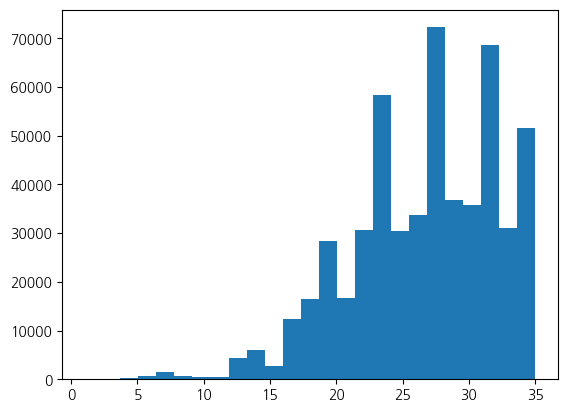

In [38]:
#상품명의 길이
print(df['Description'].str.len().describe()) #NaN은 빠진 결과임
plt.hist(df['Description'].str.len(),bins=25)
plt.show()

Description
4.0    212591
5.0    140746
3.0     88466
6.0     66240
7.0     16757
2.0     12020
1.0      2634
8.0      1000
Name: count, dtype: int64


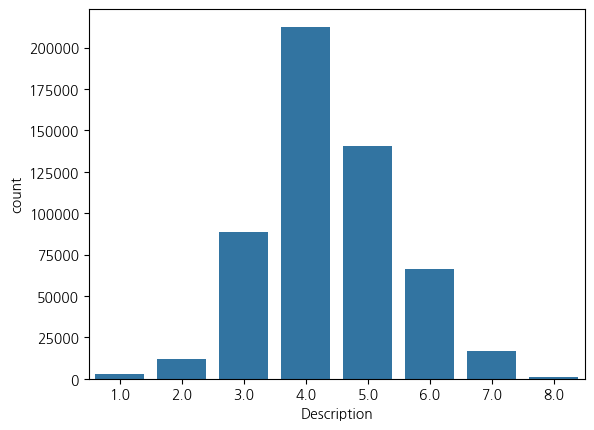

In [39]:
#상품명을 구성하는 단어 수 확인
df_Des = df['Description'].str.split()
print(df_Des.str.len().value_counts())
sns.barplot(df_Des.str.len().value_counts())
plt.show()

In [40]:
display(df[df_Des.str.len() == 8])
display(df[df_Des.str.len() == 1])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
928,536500,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,3,2010-12-01 12:35:00,2.95,17377.0,United Kingdom,0
1999,536551,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2010-12-01 14:34:00,2.95,17346.0,United Kingdom,0
2020,536551,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,1,2010-12-01 14:34:00,2.95,17346.0,United Kingdom,0
2845,536592,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,5,2010-12-01 17:06:00,5.91,NaN,United Kingdom,0
3009,536592,85227,SET OF 6 3D KIT CARDS FOR KIDS,2,2010-12-01 17:06:00,1.66,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
539350,581439,85227,SET OF 6 3D KIT CARDS FOR KIDS,1,2011-12-08 16:30:00,1.63,NaN,United Kingdom,0
539831,581439,23309,SET OF 60 I LOVE LONDON CAKE CASES,1,2011-12-08 16:30:00,1.25,NaN,United Kingdom,0
540849,581492,85227,SET OF 6 3D KIT CARDS FOR KIDS,3,2011-12-09 10:03:00,1.63,NaN,United Kingdom,0
541153,581492,23309,SET OF 60 I LOVE LONDON CAKE CASES,2,2011-12-09 10:03:00,1.25,NaN,United Kingdom,0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,0
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,0
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany,0
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE,0
...,...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany,0
541541,581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,1
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,0
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,0


In [41]:
print(df[df_Des.str.len() == 8]['Description'].str.startswith('SET').value_counts()) #SET으로 시작하는 데이터가 많음
print(df['Description'].str.startswith('SET').value_counts()) #그렇다고 SET으로 시작하는게 다 8단어는 아님

Description
True     985
False     15
Name: count, dtype: int64
Description
False    496842
True      43612
Name: count, dtype: int64


In [42]:
#리스트형태로 저장되어있는 값들을 분해해 하나의 리스트에 저장해주는 함수(NaN때문에 float가 아니라는 조건문이 들어가 있음)
def flatten_data(data):
    return [item for sublist in data if not isinstance(sublist, float) for item in sublist]

Des_words = flatten_data(df_Des)

In [43]:
print('Description을 구성하는 단어 수:',len(Des_words)) #띄어쓰기로 구분했을 경우
print('Description을 구성하는 단어 종류:',len(set(Des_words)))
set(Des_words)

Description을 구성하는 단어 수: 2368905
Description을 구성하는 단어 종류: 2614


{'JET',
 'LT',
 'BANGLE',
 'TRANSFER',
 'REAM',
 'STANDING',
 'NECKLACE+BRACELET',
 'TRIOBASE',
 'MONTANA',
 '15C',
 'SEVENTEEN',
 'MIXING',
 'coded',
 'WHITE/RED',
 'BOY',
 'S/2',
 'PANEL',
 'RECTANGLE',
 'problem',
 'PARASOLS',
 'No',
 'FRIENDS',
 'TAGS',
 'CHEESE',
 'WRAPS',
 'INVITES',
 'MATCHES',
 'JUNK',
 'BEETLES',
 'put',
 'PIGGY',
 'DRAGON',
 'NOTTING',
 'BAROQUECANDLESTICK',
 'BACK',
 'PINK/AMETHYST',
 'PUPPET',
 'BEAK',
 'BICYCLE',
 'DRAWING',
 'SPOONS',
 'SINGING',
 'BRONZE',
 'did',
 'PURPLE',
 'OVERNIGHT',
 'MUGS',
 'orders',
 'ANGEL,PINK',
 'FULL',
 '17214',
 'PISTACHIO',
 'CRUSOE',
 '16963',
 'STRAWBERRY',
 'BED',
 '£30.00',
 'ENGLISH',
 'IS',
 'WINDSOCK',
 'CHOICE',
 'HEXAGON',
 'PINK',
 'YOU',
 're',
 'SET/9',
 'CANDLE+INCENSE',
 'CADET',
 'BUS',
 'PRESENTS',
 'DECOUPAGE,GREETING',
 'PARIS',
 'FRUITBOWL',
 'CHARLIE+LOLA"EXTREMELY',
 'CARS',
 'GLASS/SHELL/PEARL',
 'allocate',
 'SHELLS',
 'LIPSTICK',
 'CHEERFUL',
 'FORTIES',
 '17086',
 'FACETED',
 'GARDENERS',
 'EARRING

### Quantity

In [44]:
print('음수인 Quantity 수',(df['Quantity'] < 0).sum())

print('취소된 주문 중 수량(Quantity)이 양수인 자료의 수:',(df[df['Cancel']==1]['Quantity'] > 0).sum())
print('성사된 주문 중 수량(Quantity)이 음수인 자료의 수:',(df[df['Cancel']==0]['Quantity'] < 0).sum())

df_completed = df[df['Cancel']==0] #성사된 주문만 뽑아 저장
display(df_completed[df_completed['Quantity'] < 0])

print(df_completed[df_completed['Quantity'] < 0]['UnitPrice'].value_counts()) #Price가 다 0임
print(df_completed[df_completed['Quantity'] < 0]['CustomerID'].isna().sum()) #CustomerID도 다 NaN임

print('\n반대로 확인')
print((df['UnitPrice'] == 0).sum())
print(df['CustomerID'].isna().sum())
print(((df['UnitPrice'] == 0) & df['CustomerID'].isna()).sum()) #반대는 아님


음수인 Quantity 수 10624
취소된 주문 중 수량(Quantity)이 양수인 자료의 수: 0
성사된 주문 중 수량(Quantity)이 음수인 자료의 수: 1336


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,0
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,0
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,0


UnitPrice
0.0    1336
Name: count, dtype: int64
1336

반대로 확인
2515
135080
2475


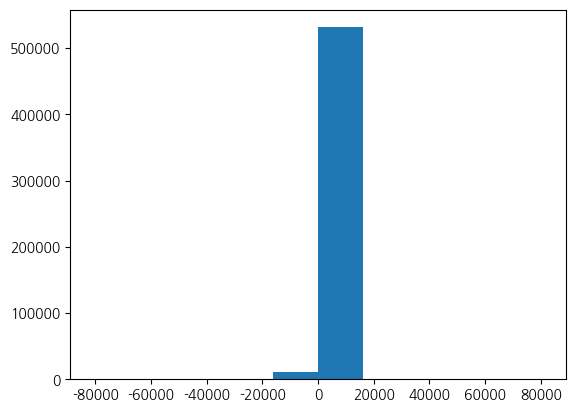

[-12.5, 23.5]


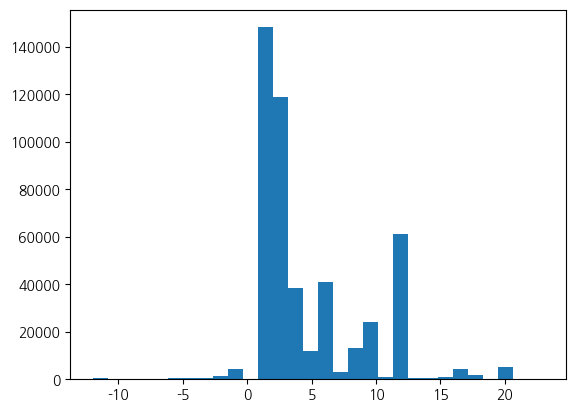

In [45]:
plt.hist(df['Quantity'])
plt.rcParams['axes.unicode_minus'] = False #음수에 (-)표현
plt.show()

#IQR을 기준으로 범위 내 값만 hist로 표현
Q1_Quan, Q3_Quan = df['Quantity'].quantile([0.25,0.75])
IQR_Quan =  Q3_Quan - Q1_Quan
normal_bound_Quan = [Q1_Quan-1.5*IQR_Quan, Q3_Quan + 1.5 * IQR_Quan]
print(normal_bound_Quan)

plt.hist(df[(normal_bound_Quan[0] <= df['Quantity']) & (df['Quantity'] <= normal_bound_Quan[1])]['Quantity'], bins=30)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### UnitPrice

In [46]:
df[df['UnitPrice']<0] #앞에서 봤던 InvoiceNo가 A로 시작하는 데이터

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,0
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,0


In [47]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,0


In [48]:
df[df['UnitPrice']==0]['Cancel'].value_counts() #UnitPrice가 0인 값들 중 취소된 건은 없음

Cancel
0    2515
Name: count, dtype: int64

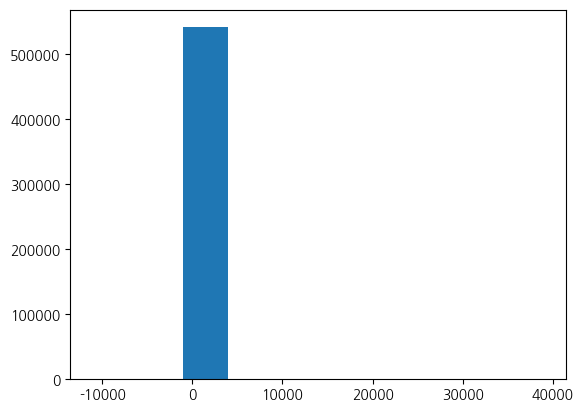

[-3.0700000000000003, 8.45]


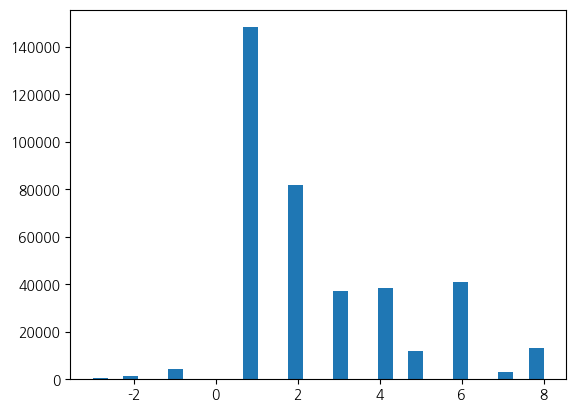

In [49]:
plt.hist(df['UnitPrice'])
plt.rcParams['axes.unicode_minus'] = False
plt.show()

#IQR을 기준으로 정상범위 내의 값들만 다시 hist로 표현
Q1_pr, Q3_pr = df['UnitPrice'].quantile([0.25,0.75])
IQR_pr =  Q3_pr - Q1_pr
normal_bound_pr = [Q1_pr-1.5*IQR_pr, Q3_pr + 1.5 * IQR_pr]
print(normal_bound_pr)

plt.hist(df[(normal_bound_pr[0] <= df['Quantity']) & (df['Quantity'] <= normal_bound_pr[1])]['Quantity'],bins=30)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### CustomerID
결측치 존재(결측치를 0이나 -1등으로 표현하는 건 어떨지) -> 삭제하는 방향이 제일 좋아보이긴함(연관분석 및 추천시스템관점)

In [50]:
df['CustomerID'].isna().sum()

135080

In [51]:
df['CustomerID'] = df['CustomerID'].fillna(0).astype(int)

print('고객 수:',len(df['CustomerID'].unique()) -1)
print(df['CustomerID'].value_counts())

고객 수: 4372
CustomerID
0        135080
17841      7983
14911      5903
14096      5128
12748      4642
          ...  
13270         1
17763         1
17291         1
15668         1
15562         1
Name: count, Length: 4373, dtype: int64


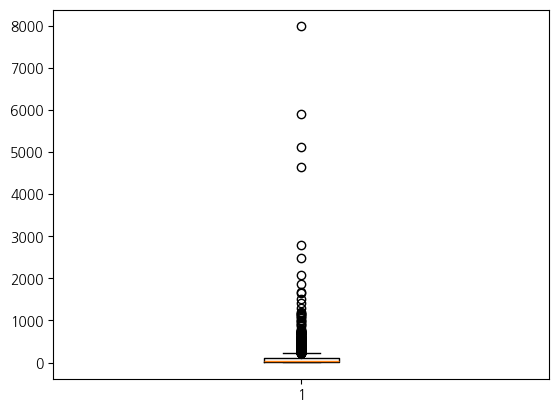

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: count, dtype: float64

In [52]:
#고객별 구매 수 확인
plt.boxplot(df[df['CustomerID'] !=0]['CustomerID'].value_counts())
plt.show()

df[df['CustomerID'] !=0]['CustomerID'].value_counts().describe()

### InvoiceDate (2010년 12월 1일 ~ 2011년 12월 9일)

In [53]:
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


In [54]:
df['InvoiceDate'].describe()

count                           541909
mean     2011-07-04 13:34:57.156386048
min                2010-12-01 08:26:00
25%                2011-03-28 11:34:00
50%                2011-07-19 17:17:00
75%                2011-10-19 11:27:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [55]:
# 시간 범위 확인
print("Earliest Date:", df['InvoiceDate'].min())
print("Latest Date:", df['InvoiceDate'].max())

Earliest Date: 2010-12-01 08:26:00
Latest Date: 2011-12-09 12:50:00


In [56]:
# 연도별 거래량 분석
# 2011년의 거래량(42481건)이 2010년의 거래량(499428건)보다 확연히 많음
df['Year'] = df['InvoiceDate'].dt.year
monthly_transactions = df.groupby('Year').size()
monthly_transactions

Year
2010     42481
2011    499428
dtype: int64

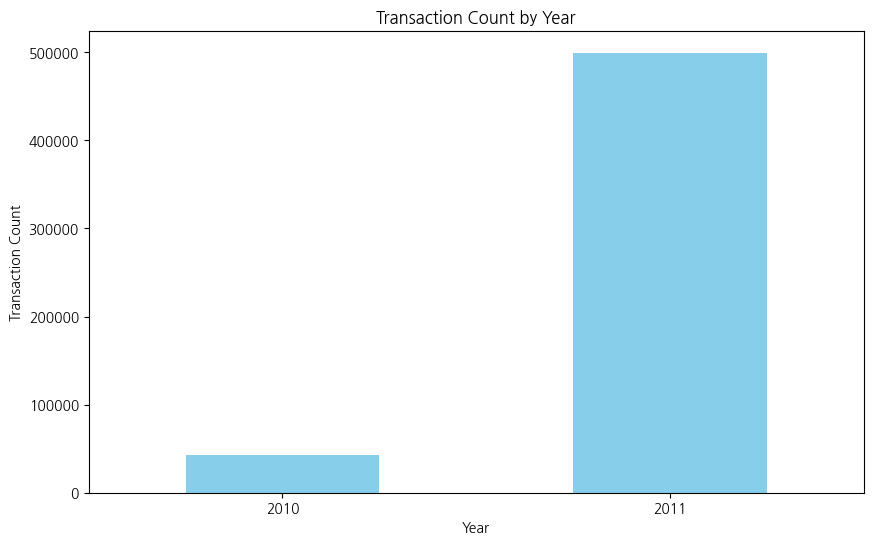

In [57]:
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Year')
plt.xticks(rotation=0)
plt.show()

In [58]:
# 월별 거래량 분석 
# 11월의 거래량이 84711건으로 가장 많음
df['Month'] = df['InvoiceDate'].dt.month
monthly_transactions = df.groupby('Month').size()
monthly_transactions

Month
1     35147
2     27707
3     36748
4     29916
5     37030
6     36874
7     39518
8     35284
9     50226
10    60742
11    84711
12    68006
dtype: int64

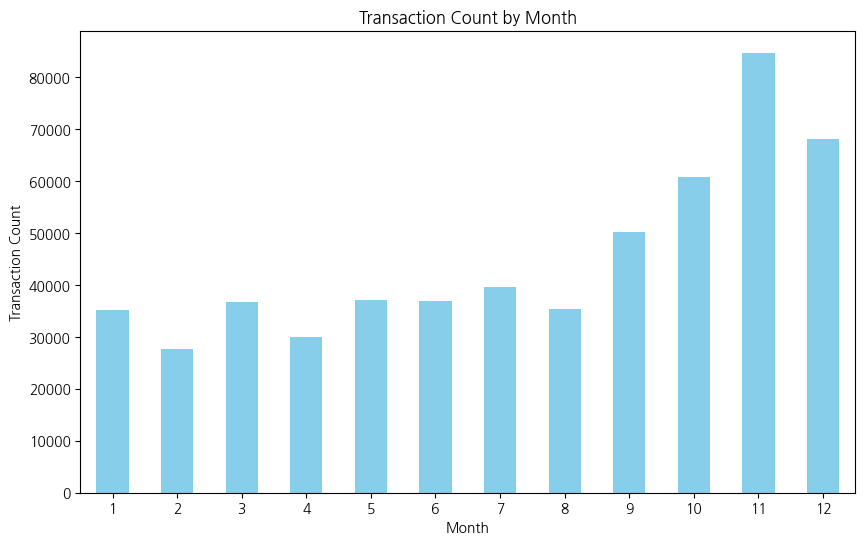

In [59]:
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Month')
plt.xticks(rotation=0)
plt.show()

In [60]:
import matplotlib as mpl

print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

C:\Users\oky40\AppData\Roaming\Python\Python311\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\oky40\.matplotlib
['NanumGothic']
10.0


Weekday
목요일    103857
화요일    101808
월요일     95111
수요일     94565
금요일     82193
일요일     64375
Name: count, dtype: int64


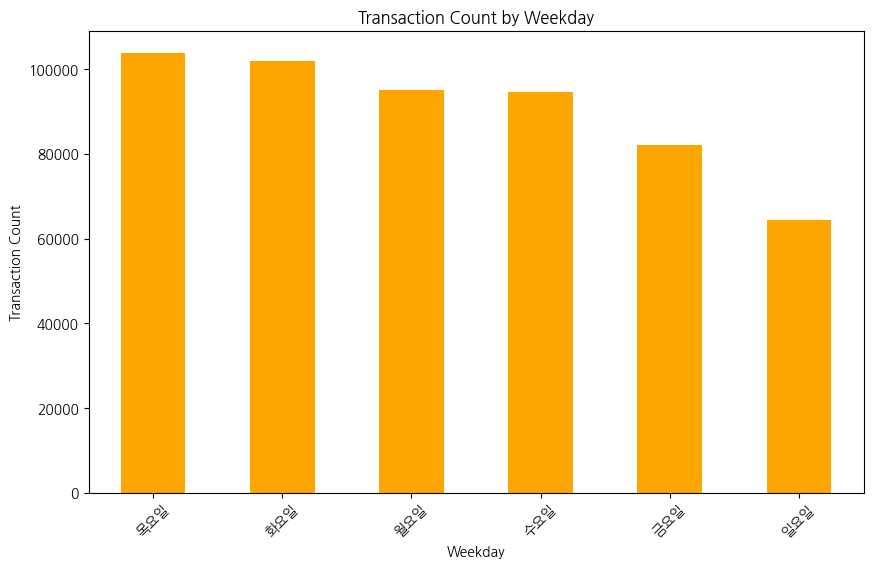

In [62]:
# 요일별 거래량 분석
# 토요일(5)은 집계되지 않음으로 보아 토요일마다 정기휴무일 가능성을 염두에 둘 수 있음
df['Weekday'] = df['InvoiceDate'].dt.dayofweek

# 요일을 문자열로 변환하기
weekday_mapping = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}
df['Weekday'] = df['Weekday'].map(weekday_mapping)

# 요일별 거래량 분석
weekday_counts = df['Weekday'].value_counts()
print(weekday_counts)

# 시각화: 요일별 거래량
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='orange')
plt.xlabel('Weekday')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Weekday')
plt.xticks(rotation=45)
plt.show()

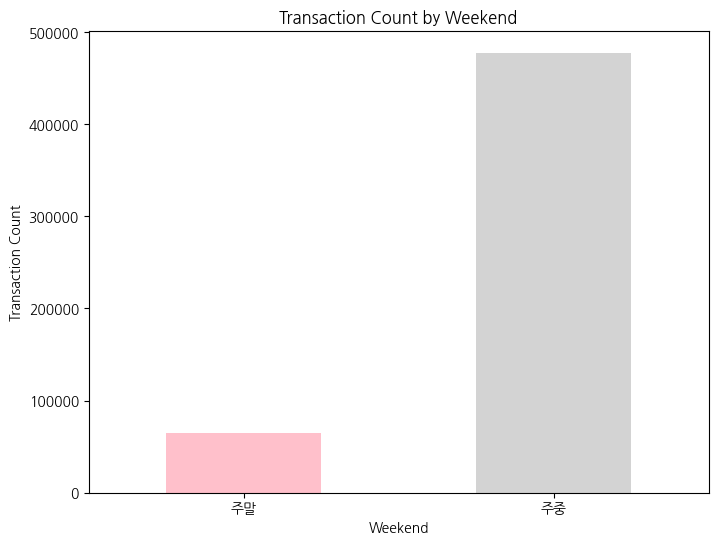

In [63]:
# 요일을 숫자로 나타내기 (0: 월요일, 1: 화요일, ..., 6: 일요일)
df['Weekday'] = df['InvoiceDate'].dt.dayofweek

# 주중(월요일 ~ 금요일)과 주말(토요일, 일요일) 구분
df['Weekend'] = df['Weekday'].apply(lambda x: '주말' if x in [5, 6] else '주중')

# 주중과 주말별 거래량 분석
weekend_transactions = df.groupby('Weekend').size()

# 시각화: 주중과 주말별 거래량
plt.figure(figsize=(8, 6))
weekend_transactions.plot(kind='bar', color=['pink', 'lightgray'])
plt.xlabel('Weekend')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Weekend')
plt.xticks(rotation=0)
plt.show()

Hour
6        41
7       383
8      8909
9     34332
10    49037
11    57674
12    78709
13    72259
14    67471
15    77519
16    54516
17    28509
18     7974
19     3705
20      871
dtype: int64


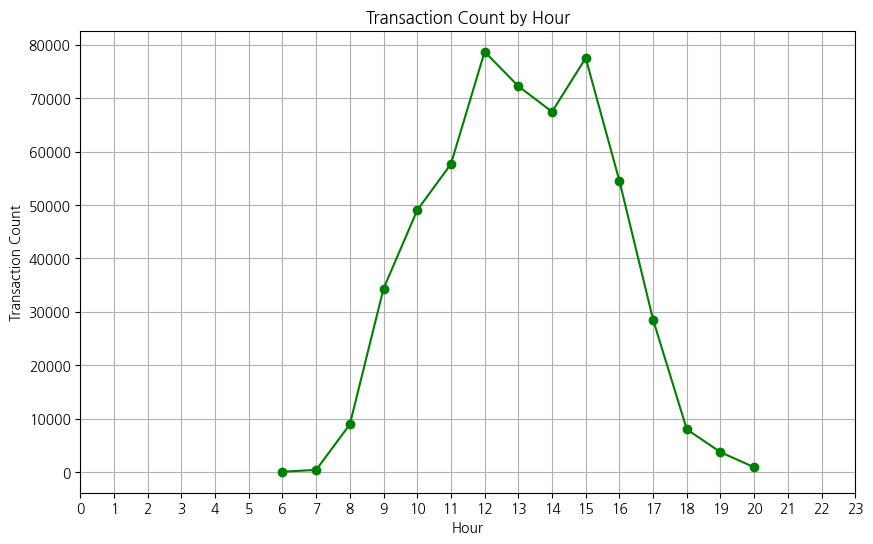

In [64]:
# 시간대별 거래량 분석
# 오후 20시부터 오전 6시까지의 거래량이 집계되지 않음으로 보아 이 시간대에 샤따다운?
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_transactions = df.groupby('Hour').size()
print(hourly_transactions)

plt.figure(figsize=(10, 6))
hourly_transactions.plot(kind='line', marker='o', color='green')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Hour')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Country

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


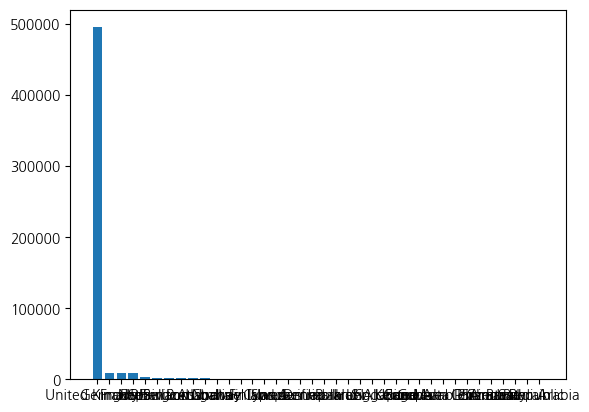

United Kingdom이 차지하는 비율: 0.914


In [65]:
print(df['Country'].value_counts())
print('\n국가 수:',len(df['Country'].unique()))

plt.bar(df['Country'].value_counts().index, df['Country'].value_counts())
plt.show()

print('United Kingdom이 차지하는 비율:',np.round(df['Country'].value_counts()[0]/len(df['Country']),3))